In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files 
import io 


uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [3]:
df = pd.read_excel(io.BytesIO(uploaded['Online Retail.xlsx']))
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Cleaning (Missing Values)

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.drop(columns=["StockCode", "CustomerID"], inplace=True)

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.isna().sum()

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

## Extract Date Time Feature

In [9]:
invoice_dt = df["InvoiceDate"].dt
df["month"] = invoice_dt.date
df["month"] = df["month"].astype(str)

In [10]:
import datetime

df['order_month'] = df['month'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
df.drop(columns=["InvoiceDate", "month"], inplace=True)

df.head()

,InvoiceNo,Description,Quantity,UnitPrice,Country,order_month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12
1,536365,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12


In [11]:
df = df[df["UnitPrice"] > 0]

In [12]:
df['GMV'] =  df['Quantity'] * df['UnitPrice']

## Melihat Korelasi antar Feature

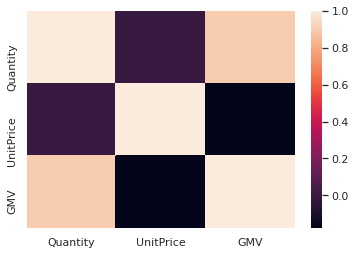

In [26]:
sns.heatmap(df.corr())
plt.show()

Quantity dengan GMV memiliki korelasi yang kuat dan positif

## Bagaimana grafik GMV per bulannya? Aapakah cenderung meningkat atau menurun?

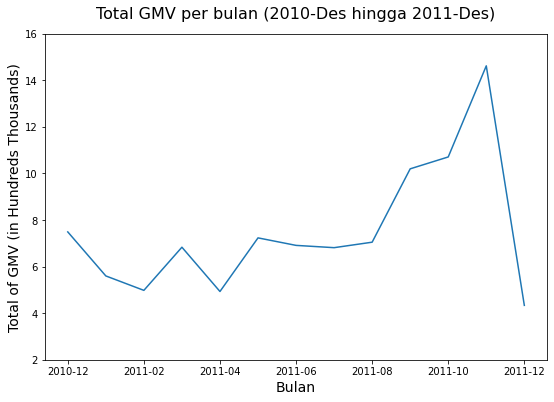

In [13]:
plt.figure(figsize=(9,6))
df.groupby(['order_month'])['GMV'].sum().plot()
plt.title(label="Total GMV per bulan (2010-Des hingga 2011-Des)", fontsize=16, pad=15)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Total of GMV (in Hundreds Thousands)", fontsize=14)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int));

### Grafik GMV cenderung fluaktif. Pada bulan Oktober, perusahaan mengalami keuntungan yang maksimal, sedangkan di bulan berikutnya mengalami penurunan yang dratis

## Apa yang membuat GMV pada bulan November mengalami penurunan?

### Menganalisa jumlah penjualan per bulannya

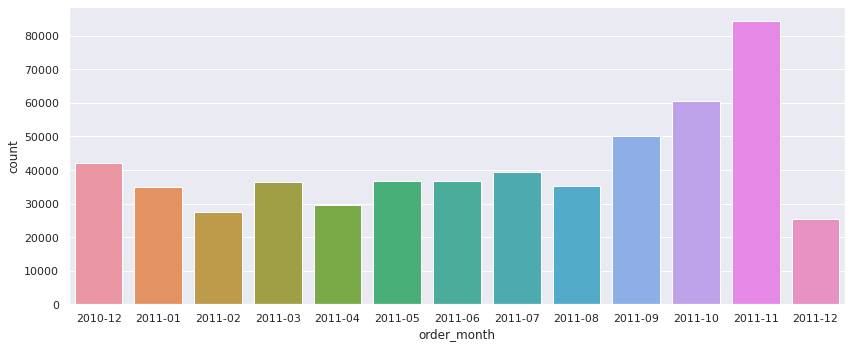

In [14]:
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.countplot(x="order_month", data=df)
plt.tight_layout()
plt.show()

Didapati jika penjualan, frekuensinya mengalami penurunan pada bulan November

## Apa yang membuat penjualan menurun pada bulan November sehinggan menyebabkan penurunan pada GMV?

### Negara yang menjadi pembeli terbanyak

In [15]:
df.groupby(["Country"])["InvoiceNo"].count().sort_values(ascending=False)

Country
United Kingdom          492979
Germany                   9493
France                    8556
EIRE                      8192
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               2001
Portugal                  1519
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57


Negara tersebut adalah `United Kingdom`

## Menganalisa perbandingan total order per bulannya untuk negara United Kingdom

In [16]:
def TopSale(x):
  if x == 'United Kingdom':
    return x
  else:
    return 'Other Country'
df["country_top_sales"] = df["Country"].apply(TopSale)
df.drop(columns="Country", inplace=True)

In [17]:
df

,InvoiceNo,Description,Quantity,UnitPrice,order_month,GMV,country_top_sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2010-12,15.30,United Kingdom
1,536365,WHITE METAL LANTERN,6,3.39,2010-12,20.34,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,2010-12,22.00,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2010-12,20.34,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2010-12,20.34,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,0.85,2011-12,10.20,Other Country
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2.10,2011-12,12.60,Other Country
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,2011-12,16.60,Other Country
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,2011-12,16.60,Other Country


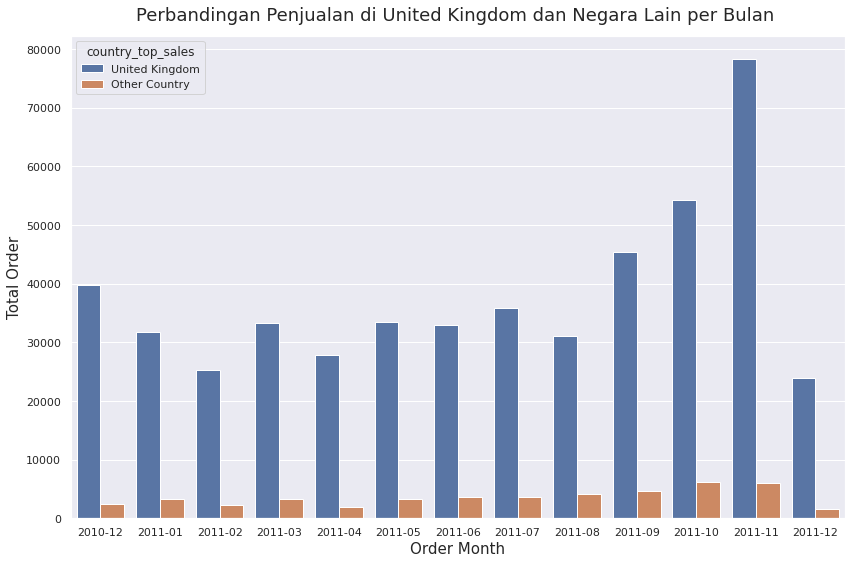

In [18]:
plt.figure(figsize=(12, 8))
plt.title(label="Perbandingan Penjualan di United Kingdom dan Negara Lain per Bulan ", fontsize=18, pad=15)
sns.countplot(x='order_month', data=df, hue='country_top_sales')
plt.xlabel("Order Month", fontsize = 15)
plt.ylabel("Total Order", fontsize = 15)
plt.tight_layout()
plt.show()

Diperoleh jika penjualan di negara tersebut mengalami penurunan yang drastis dari bulan sebelumnya

## Perbandingan total GMV per Area

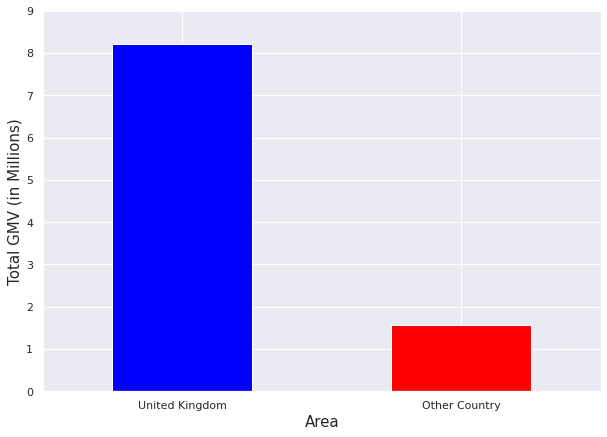

In [19]:
plt.figure(figsize=(10, 7))
df.groupby(["country_top_sales"])["GMV"].sum().sort_values(ascending=False).plot(kind='bar', color=["blue","red"])
plt.xticks(rotation=0);
plt.xlabel("Area", fontsize=15)
plt.ylabel("Total GMV (in Millions)", fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int));

# Kesimpulan
Untuk meningkatkan total GMV pada bulan November, perusahaan diharuskan untuk lebih memfokuskan penjualanya di United Kingdom, dimana jumlah penjualan mayoritas ada pada negara tersebut, dan juga negara tersebut penyumbang GMV terbesar